# BEE 4750 Homework 1: Introduction to Using Julia

**Name**:

**ID**:

> **Due Date**
>
> Thursday, 9/5/24, 9:00pm

## Overview

### Instructions

-   Problem 1 consist of a series of code snippets for you to interpret
    and debug. You will be asked to identify relevant error(s) and fix
    the code.
-   Problem 2 gives you some code that works as intended; your goal is
    to identify the code’s purpose by following its logic.
-   Problem 3 asks you to write code to generate a random vector and
    subtract off its mean, using a Julia syntax called broadcasting.
-   Problem 4 asks you to convert a verbal description of a wastewater
    treatment system into a Julia function, and then to use that
    function to explore the impact of different wastewater allocation
    strategies.
-   Problem 5 (5750 only) asks you to use more advanced Julia
    techniques.

### Load Environment

The following code loads the environment and makes sure all needed
packages are installed. This should be at the start of most Julia
scripts.

In [1]:
import Pkg
Pkg.activate(@__DIR__)
Pkg.instantiate()

  Activating project at `c:\Users\12188\OneDrive - Cornell University\BEE 4750\homework\hw1-ashton-pihl`
   Installed ConcurrentUtilities ───────── v2.4.1
   Installed ArnoldiMethod ─────────────── v0.4.0
   Installed NetworkLayout ─────────────── v0.4.6
   Installed OffsetArrays ──────────────── v1.14.0
   Installed EarCut_jll ────────────────── v2.2.4+0
   Installed GR_jll ────────────────────── v0.73.5+0
   Installed StaticArrays ──────────────── v1.9.4
   Installed StaticArraysCore ──────────── v1.4.2
   Installed GLFW_jll ──────────────────── v3.3.9+0
   Installed Ratios ────────────────────── v0.4.5
   Installed TranscodingStreams ────────── v0.10.9
   Installed IJulia ────────────────────── v1.24.2
   Installed GraphRecipes ──────────────── v0.5.13
   Installed Xorg_libxcb_jll ───────────── v1.15.0+0
   Installed CodecZlib ─────────────────── v0.7.4
   Installed Graphs ────────────────────── v1.11.0
   Installed GeometryTypes ─────────────── v0.8.5
   Installed Conda ───────────

Standard Julia practice is to load all needed packages at the top of a
file. If you need to load any additional packages in any assignments
beyond those which are loaded by default, feel free to add a `using`
statement, though [you may need to install the
package](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#package-management).

In [11]:
using Random
using Plots
using GraphRecipes
using LaTeXStrings
using Statistics

In [3]:
# this sets a random seed, which ensures reproducibility of random number generation. You should always set a seed when working with random numbers.
Random.seed!(1)

TaskLocalRNG()

## Problems (Total: 50/60 Points)

### Problem 1 (15 points)

The following subproblems all involve code snippets that require
debugging.

**For each of them**:

-   identify and describe the logic and/or syntax error;
-   write a fixed version of the function;
-   use your fixed function to solve the problem.

#### Problem 1.1

You’ve been tasked with writing code to identify the minimum value in an
array. You cannot use a predefined function. Your colleague suggested
the function below, but it does not return the minimum value.

MY SOLUTION:
min_value is set to zero before the loop which is immediately logically compared to the first value of the array inside the loop. this is a problem as the array value will never be less than zero (unless negative). min_value should be instead initialized as infinity. below is the revised code and correct output:

In [12]:
function minimum(array)
    min_value = Inf
    for i in 1:length(array)
        if array[i] < min_value
            min_value = array[i]
        end
    end
    return min_value
end

array_values = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
@show minimum(array_values);

minimum(array_values) = 78


#### Problem 1.2

Your team is trying to compute the average grade for your class, but the
following code produces an error.

MY SOLUTION: the function input is defined as grades, but the array student_grades is called inside of the function. the array should instead be the defined function input grades. the function should then be called after it is established with student_grades as the input instead of inside of the function itself. i also used a using statement with the Statistics package in order to access the function mean. below is the revised code and correct output:

In [13]:
student_grades = [89, 90, 95, 100, 100, 78, 99, 98, 100, 95]
function class_average(grades)
  average_grade = mean(grades)
  return average_grade
end

@show class_average(student_grades);

class_average(student_grades) = 94.4


#### Problem 1.3

Your team wants to know the expected payout of an old Italian dice game
called *passadieci* (which was analyzed by Galileo as one of the first
examples of a rigorous study of probability). The goal of passadieci is
to get at least an 11 from rolling three fair, six-sided dice. Your
strategy is to compute the average wins from 1,000 trials, but the code
you’ve written below produces an error.

MY SOLUTION: for loops in julia must be written as for i in 1:N not for i = 1:N. function to create matrix of zeros in julia is zeros not zero. logic operator in the for loop should be >= if the goal is to get at least eleven to win. below is the revised code:

In [44]:
function passadieci()
    # this rand() call samples 3 values from the vector [1, 6]
    roll = rand(1:6, 3) 
    return roll
end
n_trials = 1_000
outcomes = zeros(n_trials)
for i in 1:n_trials
    outcomes[i] = (sum(passadieci()) >= 11)
end
win_prob = sum(outcomes) / n_trials # compute average number of wins
@show win_prob;

win_prob = 0.524


### Problem 2 (5 points)

You’ve been handed some code to analyze. The original coder was not very
considerate of other potential users: the function is called
`mystery_function` and there are no comments explaining the purpose of
the code. It appears to take in an array and return some numbers, and
you’ve been assured that the code works as intended.

In [57]:
# function mystery_function outputs all elements contained in an array,
# removing elements that are repeated
function mystery_function(values)
    y = []
    for v in values
        # for each element in values, checks if the element is already contained
        # in the function output vector y
        if !(v in y)
            # if element is not yet in output vector y, it is added to y
            append!(y, v)
        end
    end
    # elements in values without repetition are output from function as y
    return y
end

list_of_values = [1, 2, 3, 4, 3, 4, 2, 1]
@show mystery_function(list_of_values);
# function union() serves the same purpose as mystery_function
@show union(list_of_values);

mystery_function(list_of_values) = Any[1, 2, 3, 4]
union(list_of_values) = [1, 2, 3, 4]


**In this problem**:

-   Explain the purpose of `mystery_function`. <br>
mystery_function outputs all elements contained in an array, removing elements that are repeated. <br>
-   Add comments to the code, explaining why and how it works. Refer to
    [“Best Practices for Writing Code
    Comments”](https://stackoverflow.blog/2021/12/23/best-practices-for-writing-code-comments/),
    and remember that bad comments can be just as bad as no comments at
    all. You do not need to add comments to every line (in fact, this is
    very bad practice), but you should note the *purpose* of every
    “section” of code, and add comments explaining any code sequences
    that you don’t immediately understand.
-   Is there a built-in Julia function that does the same thing as
    `mystery_function`? If so, what is it? Use it to do the same thing
    as the code above. <br>
    Yes, the function union() behaves the same by removing repeated elements.

### Problem 3 (10 points)

You’re interested in writing some code to remove the mean of a vector.

**In this problem**:

-   Write a function `compute_mean(v)` which sums all of the elements of
    a vector `v` using a `for` loop and computes the mean.
-   Make a random vector `random_vect` of length 10 using Julia’s
    `rand()` function. Use your `compute_mean()` function to calculate
    its mean and subtract it from `random_vect` **without a loop**
    (using a Julia technique called *broadcasting*; feel free to consult
    the Julia documentation and search as necessary). Check that the new
    vector has mean zero.

In [3]:
function compute_mean(v)
    sum_of_elements = 0
    for i in 1:length(v)
        sum_of_elements = sum_of_elements + v[i]
    end
    mean_of_v = sum_of_elements / length(v)
end
random_vect = rand(1:10,10)
solution = random_vect .- compute_mean.(random_vect)
if compute_mean(solution) == 0
    show("mean is zero, subtracted correctly!")
end

"mean is zero, subtracted correctly!"

### Problem 4 (20 points)

Cheap Plastic Products, Inc. is operating a plant that produces
$100 \text{m}^3\text{/day}$ of wastewater that is discharged into
Pristine Brook. The wastewater contains $1 \text{kg/m}^3$ of YUK, a
toxic substance. The US Environmental Protection Agency has imposed an
effluent standard on the plant prohibiting discharge of more than
$20 \text{kg/day}$ of YUK into Pristine Brook.

Cheap Plastic Products has analyzed two methods for reducing its
discharges of YUK. Method 1 is land disposal, which costs $X_1^2/20$
dollars per day, where $X_1$ is the amount of wastewater disposed of on
the land ($\text{m}^3\text{/day}$). With this method, 20% of the YUK
applied to the land will eventually drain into the stream (*i.e.*, 80%
of the YUK is removed by the soil).

Method 2 is a chemical treatment procedure which costs \$1.50 per
$\text{m}^3$ of wastewater treated. The chemical treatment has an
efficiency of $e= 1 - 0.005X_2$, where $X_2$ is the quantity of
wastewater ($\text{m}^3\text{/day}$) treated. For example, if
$X_2 = 50 \text{m}^3\text{/day}$, then $e = 1 - 0.005(50) = 0.75$, so
that 75% of the YUK is removed.

Cheap Plastic Products is wondering how to allocate their wastewater
between these three disposal and treatment methods (land disposal, and
chemical treatment, and land disposal) to meet the effluent standard
while keeping costs manageable.

The flow of wastewater through this treatment system is shown in
<a href="#fig-wastewater" class="quarto-xref">Figure 1</a>. Modify the
edge labels (by editing the `edge_labels` dictionary in the code
producing <a href="#fig-wastewater" class="quarto-xref">Figure 1</a>) to
show how the wastewater allocations result in the final YUK discharge
into Pristine Brook. For the `edge_label` dictionary, the tuple $(i, j)$
corresponds to the arrow going from node $i$ to node $j$. The syntax for
any entry is `(i, j) => "label text"`, and the label text can include
mathematical notation if the string is prefaced with an `L`, as in
`L"x_1"` will produce $x_1$.

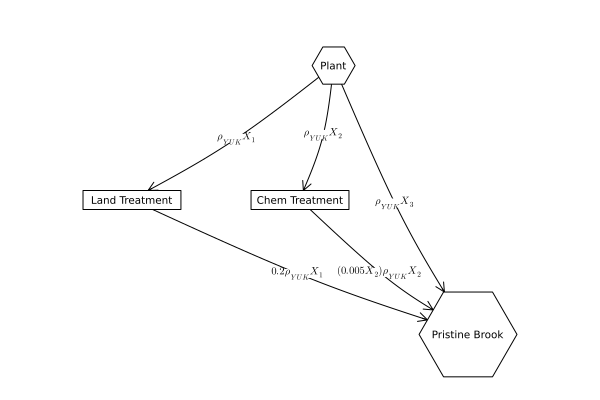

In [113]:
A = [0 1 1 1;
    0 0 0 1;
    0 0 0 1;
    0 0 0 0]

names = ["Plant", "Land Treatment", "Chem Treatment", "Pristine Brook"]
# modify this dictionary to add labels
edge_labels = Dict((1, 2) => L"\rho_{YUK}X_1", (1,3) => L"\rho_{YUK}X_2", 
(1, 4) => L"\rho_{YUK}X_3",(2, 4) => L"0.2\rho_{YUK}X_1",(3, 4) => 
L"(0.005X_2)\rho_{YUK}X_2")
shapes=[:hexagon, :rect, :rect, :hexagon]
xpos = [0, -1.5, -0.25, 1]
ypos = [1, 0, 0, -1]

p = graphplot(A, names=names,edgelabel=edge_labels, markersize=0.15, markershapes=shapes, markercolor=:white, x=xpos, y=ypos)
display(p)

**In this problem**:

-   Formulate a mathematical model for the treatment cost and the amount
    of YUK that will be discharged into Pristine Brook based on the
    wastewater allocations. This is best done with some equations and
    supporting text explaining the derivation. Make sure you include, as
    additional equations in the model, any needed constraints on
    relevant values. You can find some basics on writing mathematical
    equations using the LaTeX typesetting syntax
    [here](https://viveks.me/environmental-systems-analysis/tutorials/latex-notebook.qmd),
    and a cheatsheet with LaTeX commands can be found on the course
    website’s [Resources
    page](https://viveks.me/environmental-systems-analysis/resources/markdown.qmd).

MY SOLUTION: <br>
$\rho_{YUK}$: concentration of YUK in wastewater $kg/{m}^3$<br>
$X$: wastewater production rate of plant ${m}^3/d$<br>
$X_i$: wastewate load from plant headed to each disposal method ${m}^3/d$<br>
$L_i$: YUK loading mass from each disposal method into Pristine Brook $kg/d$<br>
$C_i$: cost of treatment of each disposal method $dollars/d$<br>

$X = X_1 + X_2 + X_3$ continuity of total daily wastewater <br>
$L_1 = 0.2\rho_{YUK}X_1$ loading of YUK from land disposal daily<br>
$L_2 = (0.005X_2)\rho_{YUK}X_2$ loading of YUK from chemical treatment daily<br>
$L_3 = \rho_{YUK}X_3$ loading of YUK from untreated discharge daily<br>
$YUK Loading = L_1 + L_2 + L_3$ total YUK mass discharged in Pristine Brook daily
$Total YUK = \rho_{YUK}X = 0.8\rho_{YUK}X_1 + L_1 + (1-0.005X_2)\rho_{YUK}X_2 + L_2 + L_3$ continuity of total daily YUK mass <br>
$C_1$ = ${X_1}^2/20$ total cost of land disposal in dollars daily<br>
$C_2$ = $1.50X_2$ total cost of chemical treatment in dollars daily <br>
$Total Cost = C_1 + C_2$ total cost of disposal daily<br>



-   Implement your systems model as a Julia function which computes the
    resulting YUK concentration and cost for a particular treatment
    plan. You can return multiple values from a function with a
    [tuple](https://docs.julialang.org/en/v1/manual/functions/#Tuples-1),
    as in:

    ``` {julia}
    function multiple_return_values(x, y)
        return (x+y, x*y)
    end

    a, b = multiple_return_values(2, 5)
    @show a;
    @show b;
    ```

    To evalute the function over vectors of inputs, you can *broadcast*
    the function by adding a decimal `.` before the function arguments
    and accessing the resulting values by writing a *comprehension* to
    loop over the individual outputs in the vector:

    ``` {julia}
    x = [1, 2, 3, 4, 5]
    y = [6, 7, 8, 9, 10]

    output = multiple_return_values.(x, y)
    a = [out[1] for out in output]
    b = [out[2] for out in output]
    @show a;
    @show b;
    ```

    Make sure you comment your code appropriately to make it clear what
    is going on and why.

-   Use your function to experiment with some different combinations of
    wastewater discharge and treatment and plot the results of these
    experiments. Can you find one that satisfies the YUK effluent
    standard (plot this as well as a dashed red line)? What was the
    cost? What can you say about the tradeoff between treatment cost and
    YUK concentration? You don’t have to find an “optimal” solution to
    this problem, but what do you think would be needed to find a better
    solution?

    MY SOLUTION:
    Having 69 cubic meters go to land disposal, 31 cubic meters go to chemical treatment, and no wastewater left untreated a day satisfies the standard with a daily discharge of 18.605 kg/d and a total daily cost of $284.55. The tradeoff seems to be that loading to the brook decreases exponentially with increased cost of treatment from the graph. To find a better solution, the simulation could be run hundreds of more times and a line could be fit to the data and optimized manually or an optimization solver could be used to find the treatment plan with the lowest cost that meets the standard.

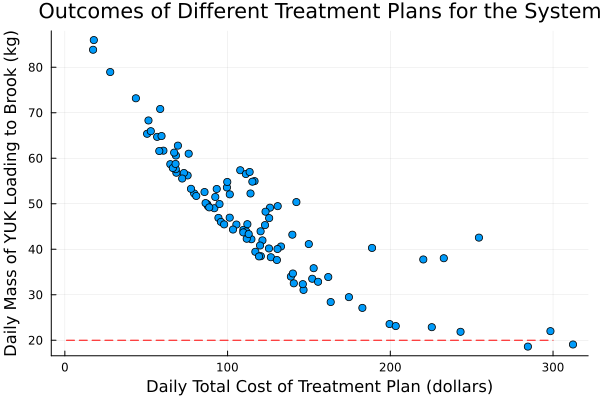

(18.605, 284.55)

In [210]:
# function treatment_plan takes in arguments:
# X1: daily effluent volume to land disposal m^3, 
# X2: daily effluent volume to chemical treatment m^3, 
# X3: daily effluent volume left untreated m^3,
# p: YUK density in wastewater kg/m^3
# and outputs (TL,TC), the total mass loading of YUK into pristine brook and the
# total cost of treatment respectively
function treatment_plan(X1,X2,X3,p)
    L1 = 0.2*p*X1; #YUK loading from land disposal
    L2 = (0.005*X2)*p*X2; #YUK loading from chemical treatment
    L3 = p*X3; #YUK loading from untreated waste
    TL = L1 + L2 + L3; #total loading 
    C1 = X1^2/20; #cost from land disposal
    C2 = 1.5*X2; #cost from chemical treatment
    TC = C1+C2; #total cost
    return (TL,TC)
end

options = zeros(101,3);
out = zeros(101,2);
# here is an example of a treatment plan that fits the standard
working_plan = treatment_plan(69,31,0,1);
print(working_plan)
options[101,:] .= [69, 31, 0];
out[101,:] .= working_plan
# this loop randomly generates treatment plans and finds their outcomes
# using treatment_plan
for i in 1:100
    options[i,:] .= rand(3);
    options[i,:] .= 100*(options[i,:]./sum(options[i,:]));
    out[i,:] .= treatment_plan(options[i,1],options[i,2],options[i,3],1);
end
# a scatterplot is displayed with a dashed red line at the standard requirement
scatter(out[:,2],out[:,1])
pl = plot!(legend=false)
line = zeros(300);
line[1:300,1] .= 20;
plot!(1:300,line,linestyle=:dash,seriescolor="red")
xlabel!("Daily Total Cost of Treatment Plan (dollars)")
ylabel!("Daily Mass of YUK Loading to Brook (kg)")
title!("Outcomes of Different Treatment Plans for the System")
display(pl)

### Problem 5 (10 points)

**This problem is only required for students in BEE 5750**.

#### Problem 5.1

Using a
[comprehension](https://viveks.me/environmental-systems-analysis/tutorials/julia-basics.html#comprehensions),
count the number of odd numbers between 0 and 149.

> **Hint**
>
> `iseven()` returns `true` for even numbers and `false` for odd
> numbers.

#### Problem 5.2

Write a function `polynomial(x, a)` which calculates the polynomial
$$p(x) = \sum_{i=1}^n a_i x^i$$

based on a point `x` and a coefficient vector `a` of length `n` using a
loop. Test your function by computing $$p(x) = 2x^3 - x^2 + 1$$ at
$x=2$.

## References

Julia 1.10 Documentation. https://docs.julialang.org/en/v1/ (accessed 2024-08-30). 

Matlab--Python--Julia Cheatsheet. https://cheatsheets.quantecon.org/ (accessed 2024-08-30). 

